In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv('/content/drive/MyDrive/New Project/processed_dataset.csv')

In [3]:
dataset.head()

,text,label
0,"As of March 13th , 2014 , the booklet had been...",noHate
1,In order to help increase the booklets downloa...,noHate
2,( Simply copy and paste the following text int...,noHate
3,Click below for a FREE download of a colorfull...,hate
4,Click on the `` DOWNLOAD ( 7.42 MB ) '' green ...,noHate


In [4]:
nan_count = dataset["label"].isna().sum()
print(nan_count)

0


In [5]:
print(dataset["label"].unique())

['noHate' 'hate' 'idk/skip' 'relation']


In [6]:
dataset = dataset[~dataset["label"].isin(["idk/skip", "relation"])]

In [7]:
dataset["label_binary"] = dataset["label"].map({"hate": 1, "noHate": 0}).astype(int)
dataset.head(10)

,text,label,label_binary
0,"As of March 13th , 2014 , the booklet had been...",noHate,0
1,In order to help increase the booklets downloa...,noHate,0
2,( Simply copy and paste the following text int...,noHate,0
3,Click below for a FREE download of a colorfull...,hate,1
4,Click on the `` DOWNLOAD ( 7.42 MB ) '' green ...,noHate,0
5,"Booklet updated on Feb. 14th , 2014 .",noHate,0
6,"( Now with over 18,300 Downloads. )",noHate,0
7,PDF file : http://www.mediafire.com/download/7...,noHate,0
8,Then why not simply copy this text ( & links )...,noHate,0
9,Thank you in advance. : ) Download the youtube...,noHate,0


In [8]:
df=dataset[['text','label_binary']]
df.rename(columns={"label_binary": "label"}, inplace=True)

<ipython-input-8-71b4a733ae74>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"label_binary": "label"}, inplace=True)


In [9]:
df.head()

,text,label
0,"As of March 13th , 2014 , the booklet had been...",0
1,In order to help increase the booklets downloa...,0
2,( Simply copy and paste the following text int...,0
3,Click below for a FREE download of a colorfull...,1
4,Click on the `` DOWNLOAD ( 7.42 MB ) '' green ...,0


In [10]:
df['label'].value_counts()

,count
label,
0,9507
1,1196


Text(0.5, 1.0, 'Class Distribution in dataset')

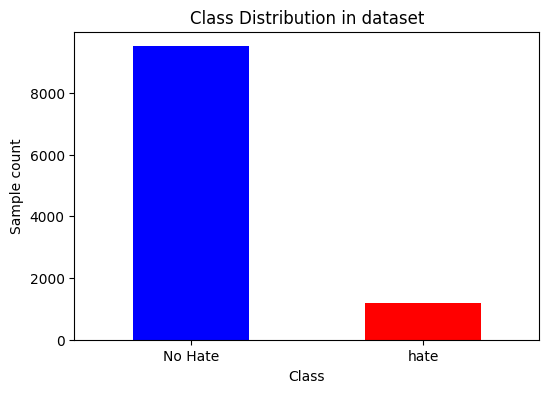

In [11]:
class_count=df['label'].value_counts()

class_labels={0: "No Hate", 1: "hate"}
class_count=class_count.rename(index=class_labels)

plt.figure(figsize=(6,4))
class_count.plot(kind='bar', color=['blue','red',])
plt.xlabel('Class')
plt.xticks(rotation=0)
plt.ylabel('Sample count')
plt.title('Class Distribution in dataset')

In [12]:
import html
import re
def preprocess_text(text):
  text = text.lower()  # Convert to lowercase
  text = html.unescape(text)  # Convert HTML entities (&amp; -> &)
  text = re.sub(r'rt\s+', '', text)  # Remove 'RT' at the start
  text = re.sub(r'http\S+|www\S+', '', text)  # Remove URLs
  text = re.sub(r'@\w+|#\w+', '', text)  # Remove mentions & hashtags
  text = re.sub(r'\d+', '', text)  # Remove numbers
  text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
  text = re.sub(r'\n+', ' ', text)  # Remove new lines
  text = text.strip()
  return text

df['cleaned_text'] = df['text'].apply(preprocess_text)

In [13]:
for i in range(0,10):
  print(df['cleaned_text'].values[i])
  print("")

as of march th    the booklet had been downloaded over  times and counting

in order to help increase the booklets downloads  it would be great if all stormfronters who had youtube accounts  could display the following text in the description boxes of their uploaded youtube videos

simply copy and paste the following text into your youtube videos description boxes

click below for a free download of a colorfully illustrated  page ebook on the zionistengineered intentional destruction of western civilization

click on the  download   mb   green banner link

booklet updated on feb th

now with over  downloads

pdf file   _ docx watch the  hour video version of  the zionist attack on western civilization    _ white _ yt _ comment _  hyperlinked  txt   hyperlinkedbackup  dtxt   v  _ hgalpm are you interested in helping spread the booklet download link across the world

then why not simply copy this text   links  and paste it into the description box of your youtube videos

thank you in adv

In [14]:
df.head()

,text,label,cleaned_text
0,"As of March 13th , 2014 , the booklet had been...",0,as of march th the booklet had been downloa...
1,In order to help increase the booklets downloa...,0,in order to help increase the booklets downloa...
2,( Simply copy and paste the following text int...,0,simply copy and paste the following text into ...
3,Click below for a FREE download of a colorfull...,1,click below for a free download of a colorfull...
4,Click on the `` DOWNLOAD ( 7.42 MB ) '' green ...,0,click on the download mb green banner link


In [20]:
df=df[['cleaned_text', 'label']]
df.rename(columns={"cleaned_text": "text"}, inplace=True)

<ipython-input-20-741a55471f7b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"cleaned_text": "text"}, inplace=True)


,text,label
0,as of march th the booklet had been downloa...,0
1,in order to help increase the booklets downloa...,0
2,simply copy and paste the following text into ...,0
3,click below for a free download of a colorfull...,1
4,click on the download mb green banner link,0


In [24]:
df.head()

,text,label
0,as of march th the booklet had been downloa...,0
1,in order to help increase the booklets downloa...,0
2,simply copy and paste the following text into ...,0
3,click below for a free download of a colorfull...,1
4,click on the download mb green banner link,0


In [25]:
df['label'].value_counts()

,count
label,
0,9507
1,1196


# Oversampling
## Synthetic Data Augmentation using Back Translation
### model used for translation facebook/m2m100_418M (a multilingual AI model)

In [29]:
!pip install transformers sentencepiece -q
import torch
from transformers import pipeline
from tqdm import tqdm
import warnings

# ========== 1. Suppress Warnings ========== #
warnings.filterwarnings("ignore", message="Your input_length.*")  # Ignore max_length warnings

# ========== 2. Clean & Downsample Data ========== #
df = df.dropna(subset=['text'])
df['text'] = df['text'].astype(str)
df_nohate = df[df['label'] == 0].sample(n=5000, random_state=42)
df_hate = df[df['label'] == 1]
df_balanced = pd.concat([df_nohate, df_hate])

# ========== 3. Optimized Translation Pipeline ========== #
device = 0 if torch.cuda.is_available() else -1
translator = pipeline(
    "translation",
    model="facebook/m2m100_418M",
    device=device,
    src_lang="en",
    tgt_lang="fr",
    max_length=100  # Increased to reduce warnings (minor speed tradeoff)
)

back_translator = pipeline(
    "translation",
    model="facebook/m2m100_418M",
    device=device,
    src_lang="fr",
    tgt_lang="en",
    max_length=100
)

# ========== 4. Batch Back-Translation ========== #
def batch_back_translate(texts, batch_size=16):
    translations = []
    for i in tqdm(range(0, len(texts), batch_size)):
        batch = [str(t) for t in texts[i:i+batch_size]]  # Force string conversion

        # English -> French
        fr_output = translator(
            batch,
            max_length=100,
            truncation=True,
            clean_up_tokenization_spaces=True
        )
        fr_texts = [x['translation_text'] for x in fr_output]

        # French -> English
        en_output = back_translator(
            fr_texts,
            max_length=100,
            truncation=True,
            clean_up_tokenization_spaces=True
        )
        translations.extend([x['translation_text'] for x in en_output])

    return translations

# ========== 5. Generate Data ========== #
needed_samples = 5000 - len(df_hate)
original_hate_texts = df_hate['text'].tolist()
sample_texts = np.random.choice(original_hate_texts, size=needed_samples, replace=True)

# Time: ~18-20 mins for 3804 samples (vs 15-18 with warnings)
synthetic_texts = batch_back_translate(sample_texts)

# ========== 6. Final Dataset ========== #
synth_df = pd.DataFrame({'text': synthetic_texts, 'label': 1})
final_df = pd.concat([df_balanced, synth_df]).sample(frac=1, random_state=42)

print("\nBalanced Class Distribution:")
print(final_df['label'].value_counts())

Device set to use cuda:0
Device set to use cuda:0
 10%|▉         | 23/238 [06:55<1:06:42, 18.62s/it]Your input_length: 387 is bigger than 0.9 * max_length: 100. You might consider increasing your max_length manually, e.g. translator('...', max_length=400)
Your input_length: 100 is bigger than 0.9 * max_length: 100. You might consider increasing your max_length manually, e.g. translator('...', max_length=400)
 12%|█▏        | 28/238 [08:23<1:01:01, 17.44s/it]Your input_length: 106 is bigger than 0.9 * max_length: 100. You might consider increasing your max_length manually, e.g. translator('...', max_length=400)
Your input_length: 106 is bigger than 0.9 * max_length: 100. You might consider increasing your max_length manually, e.g. translator('...', max_length=400)
Your input_length: 100 is bigger than 0.9 * max_length: 100. You might consider increasing your max_length manually, e.g. translator('...', max_length=400)
Your input_length: 100 is bigger than 0.9 * max_length: 100. You might


Balanced Class Distribution:
label
1    5000
0    5000
Name: count, dtype: int64


Text(0.5, 1.0, 'Class Distribution in dataset')

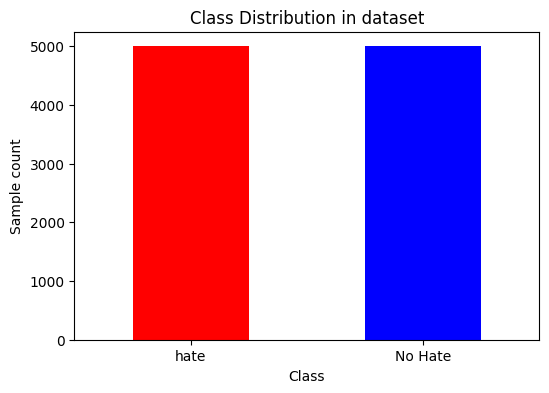

In [50]:
class_count=final_df['label'].value_counts()

class_labels={0: "No Hate", 1: "hate"}
class_count=class_count.rename(index=class_labels)

plt.figure(figsize=(6,4))
class_count.plot(kind='bar', color=['red','blue'])
plt.xlabel('Class')
plt.xticks(rotation=0)
plt.ylabel('Sample count')
plt.title('Class Distribution in dataset')

In [53]:
from google.colab import files

output_file = "balanced_dataset.csv"
final_df.to_csv(output_file, index=False)

files.download(output_file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>